In [83]:
import pandas as pd
import numpy as np
import plotly.express as px
# algorithm
from sklearn.linear_model import LogisticRegression
# pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# feature selection
from sklearn.feature_selection import SelectKBest, chi2
# preprocessing
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
# model selection
from sklearn.model_selection import train_test_split
# metrics
import sklearn.metrics as m

In [84]:
url = 'https://raw.githubusercontent.com/digipodium/Datasets/main/classfication/Social_Network_Ads.csv'
df = pd.read_csv(url)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [85]:
px.scatter(df, x='Age', y='EstimatedSalary', 
           color='Purchased', width=800)

In [86]:
X = df.drop('Purchased', axis=1)
y = df['Purchased']

In [87]:
num_cols = ['Age', 'EstimatedSalary']
cat_cols = ['Gender']

num_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
])
cat_transformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selection', SelectKBest(chi2, k=2)),
    ('model', LogisticRegression())
])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'EstimatedSalary']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['Gender'])])),
                ('selection',
                 SelectKBest(k=2,
                             score_func=<function chi2 at 0x00000246D0BAAB90>)),
                ('model', LogisticRegression())])

In [88]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1)

pipeline.fit(Xtrain, ytrain)

ypred = pipeline.predict(Xtest)

cm = m.confusion_matrix(ytest, ypred)

report = m.classification_report(ytest, ypred)

<Axes: >

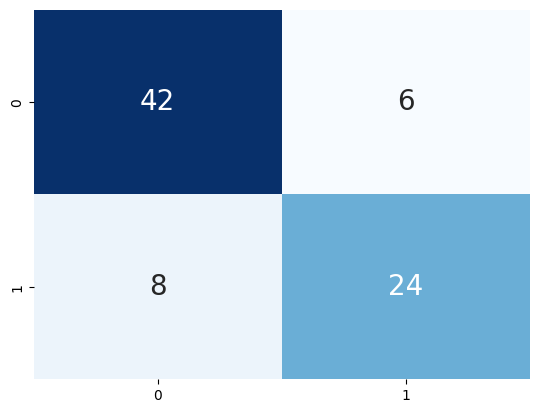

In [89]:
import seaborn as sns
sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, annot_kws={'size': 20})

In [90]:
print(report)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        48
           1       0.80      0.75      0.77        32

    accuracy                           0.82        80
   macro avg       0.82      0.81      0.82        80
weighted avg       0.82      0.82      0.82        80



In [91]:
import plotly.graph_objects as go

In [92]:
trace_specs = [
    [Xtrain, ytrain, 0, 'Train', 'cross'],
    [Xtrain, ytrain, 1, 'Train', 'circle'],
    [Xtest, ytest, 0, 'Test', 'cross-dot'],
    [Xtest, ytest, 1, 'Test', 'circle-dot']
]

fig = go.Figure(data=[
    go.Scatter(
        x=X[y==label], y=X[y==label],
        name=f'{split} Split, Label {label}',
        mode='markers', marker_symbol=marker
    ) for X, y, label, split, marker in trace_specs
])
fig.update_traces(
    marker_size=12, marker_line_width=1.5,
    marker_color="lightyellow"
)
fig